In [1]:
# Install required packages
!pip install xgboost scikit-learn joblib

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
import joblib

In [3]:
# 1. Load data
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [4]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 4. Train LightGBM model
model = LGBMClassifier(n_estimators=50, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(max_depth=3, n_estimators=50)

In [8]:
# 5. Save everything
# Save data
pd.DataFrame(X_train_scaled, columns=X.columns).to_csv("X_train_scaled.csv", index=False)
pd.DataFrame(X_test_scaled, columns=X.columns).to_csv("X_test_scaled.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [9]:
# Save model and scaler
joblib.dump(model, "lgbm_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# 6. Reload and predict (optional test block)
loaded_model = joblib.load("lgbm_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")


In [13]:

# Let's predict using the test data
X_test_loaded = pd.read_csv("X_test_scaled.csv")
y_test_loaded = pd.read_csv("y_test.csv")

predictions = loaded_model.predict(X_test_loaded)

# 7. Evaluation
accuracy = accuracy_score(y_test_loaded, predictions)
report = classification_report(y_test_loaded, predictions)
print(f"✅ Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:\n", report)

✅ Accuracy: 0.7403

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



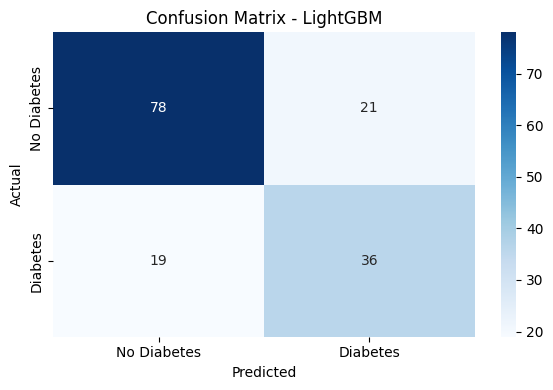

In [16]:
# 8. Confusion Matrix Plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_loaded, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM")
plt.tight_layout()
plt.show()

In [19]:
# New input data (without the Outcome column)
new_data = np.array([[8,105,100,36,0,43.3,0.239,45]])

# Load scaler and model
scaler = joblib.load("scaler.pkl")
model = joblib.load("lgbm_model.pkl")

# Scale and predict
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

# Output prediction
print("🧪 Prediction for new data point:", "Diabetic" if prediction[0] == 1 else "Not Diabetic")


🧪 Prediction for new data point: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
